# Udacity Data Science Nano Degree - Project 1

Dataset - Titanic Disaster -> https://github.com/datasciencedojo/datasets/blob/master/titanic.csv  
Name - Gaspar Mutimucuio


# Dataset background & Key Questions

The Titanic dataset is one of the most well-known datasets in the data science community. It contains detailed information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in April 1912.  
Please note that the dataset we are going to use only contains 891 records (Passengers). 

**History**
The RMS Titanic was a British passenger liner that struck an iceberg and sank in the North Atlantic Ocean on April 15, 1912. The disaster resulted in the deaths of more than 1,500 passengers and crew, making it one of the deadliest maritime disasters in history. The dataset was created to analyze the factors that influenced the survival of passengers.

**Questions I would like to answer**
1. What factors influenced survival?
2. What where the characteristics of those who did not survive?
3. Are there any correlations between ticket fares and survival?

# Load Libraries, Data and Exploratory Data Analysis

In [1]:
# Load Libraries and Data

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

df = pd.read_csv('titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above information we can tell that we have 891 records, and the columns Age, Cabin and Embarked have missing information

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Above a summary of columns and their count of missing values. Age 177, Cabin 687 and Embarked 2.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


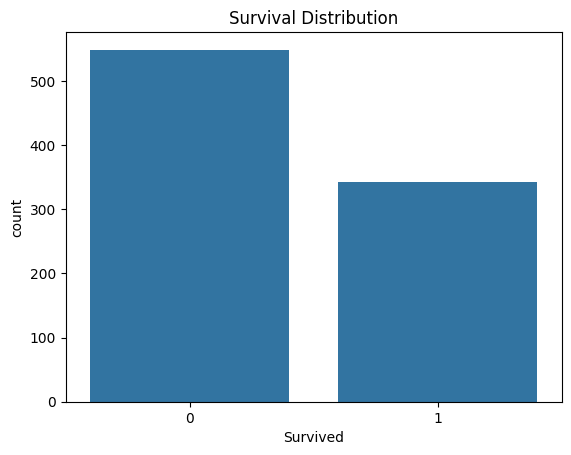

In [7]:
# Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

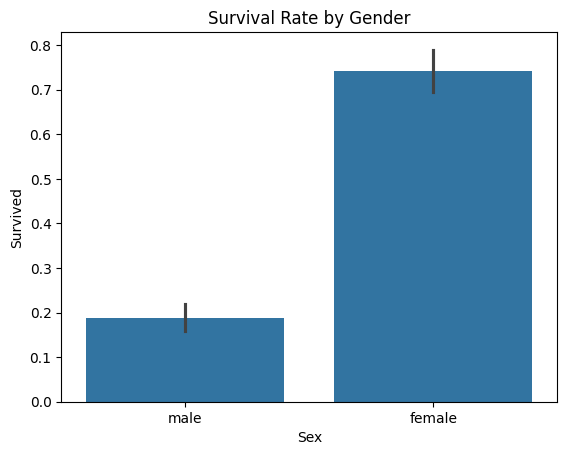

In [8]:
# Gender survival rates
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

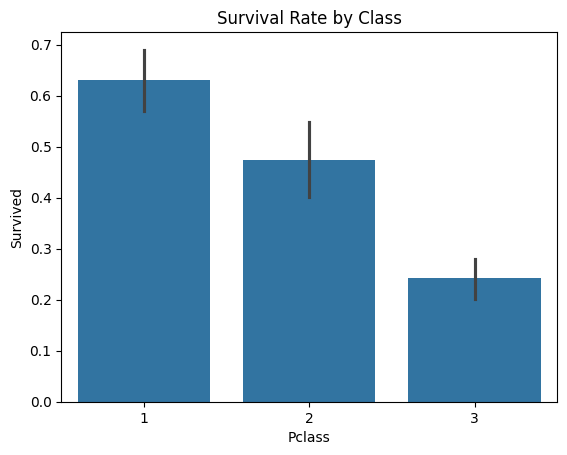

In [9]:
# Passenger Class survival rates
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

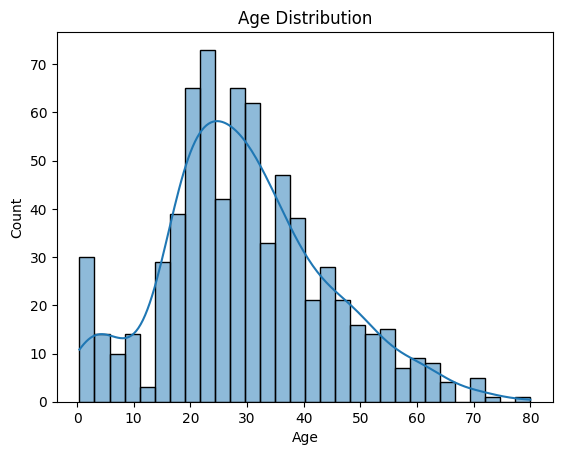

In [10]:
# Age Distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Data Wrangling & Feature Engineering

In [11]:
# Fill missing Age values with median based on Passenger Class & Sex 
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median())) 

# Fill missing Embarked values with most common port 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 

# Drop the Cabin column (too many missing values) 
df.drop(columns=['Cabin'], inplace=True) 

# Create a new feature: Family Size 
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # Include passenger themselves 

# Create a new feature: IsAlone (1 = alone, 0 = with family) 
df['IsAlone'] = (df['FamilySize'] == 1).astype(int) 

# Create a new feature: Title extracted from Name 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss') 
df['Title'] = df['Title'].replace(['Mme'], 'Mrs') 
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Sir', 'Jonkheer', 'Dona', 'Lady', 'Countess'], 'Rare') 

# Encode categorical variables (Sex, Embarked, Title) 
label_encoders = {} 
for col in ['Sex', 'Embarked', 'Title']: 
    le = LabelEncoder() 
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le 
    
# Drop unnecessary columns 
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True) 

# Standardize numerical features 
scaler = StandardScaler() 
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
C:\Users\mutig001\AppData\Local\Temp\ipykernel_3252\2073685111.py:17: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\mutig001\AppData\Local\Temp\ipykernel_3252\2073685111.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,-0.534891,1,0,-0.502445,2,0.059160,0,2
1,1,1,0,0.668392,1,0,0.786845,0,0.059160,0,3
2,1,3,0,-0.234070,0,0,-0.488854,2,-0.560975,1,1
3,1,1,0,0.442776,1,0,0.420730,2,0.059160,0,3
4,0,3,1,0.442776,0,0,-0.486337,2,-0.560975,1,2


# Train a Predictive Model

In [13]:
# Split dataset 
X = df.drop(columns=['Survived']) 
y = df['Survived'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Train multiple models 
models = { 
    "Logistic Regression": LogisticRegression(), 
    "Random Forest": RandomForestClassifier(n_estimators=100), 
    "Support Vector Machine": SVC() 
    } 

# Evaluate models 
for name, model in models.items(): 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}") 
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Random Forest Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Support Vector Machine Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg     

Based on above, Random Forest Performed Better

# Hyperparameter Tunning (using Random Forest)

In [14]:
param_grid = { 
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 5, 10] 
    } 

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train) 

best_model = grid_search.best_estimator_ 

# Final evaluation 
y_pred = best_model.predict(X_test) 
print("\nFinal Model Performance") 
print(classification_report(y_test, y_pred))


Final Model Performance
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Answering Key Questions

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


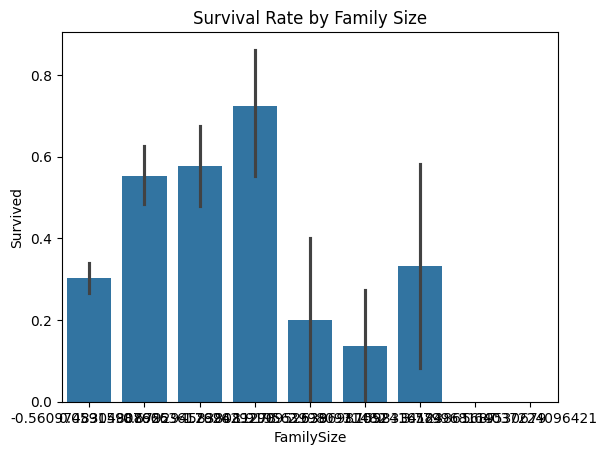

Embarked
0    0.553571
1    0.389610
2    0.339009
Name: Survived, dtype: float64


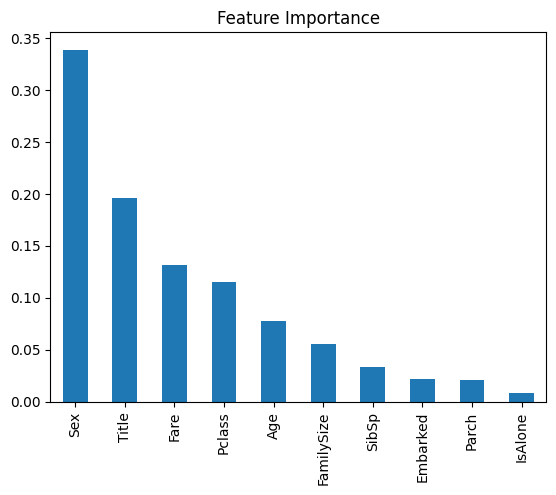

In [15]:
# Survival rate by gender 
print(df.groupby('Sex')['Survived'].mean()) 

# Survival rate by class 
print(df.groupby('Pclass')['Survived'].mean())
 
# Does family size affect survival? 
sns.barplot(x='FamilySize', y='Survived', data=df) 
plt.title('Survival Rate by Family Size') 
plt.show() 

# Does the embarkation port affect survival? 
print(df.groupby('Embarked')['Survived'].mean()) 

# Which features were most important in survival? 
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns) 
feature_importances.sort_values(ascending=False).plot(kind='bar') 
plt.title('Feature Importance') 
plt.show()

# Conclusions

* Women had a much higher survival rate than men

* First-class passengers had the highest survival rate

* Large families and solo travelers had lower survival rates

* The embarkation port had some effect, with Cherbourg passengers surviving more

* random Forest was the best predictive model